<a href="https://colab.research.google.com/github/parkgunha/Chagawa/blob/main/%EC%A4%91%EA%B3%A0%EC%B0%A8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 드라이브 연결

In [59]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

In [60]:
# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/내배캠 파이썬/3_data/')
os.getcwd()

'/content/drive/MyDrive/내배캠 파이썬/3_data'

In [62]:
# 필수 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# 데이터 파일 확인
input_path = os.getcwd() + '/used_car copy/'  # 데이터셋이 저장된 경로
file_paths = []

for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if filename.endswith('.csv'):  # CSV 파일만 선택
            file_paths.append(file_path)

print(f"총 {len(file_paths)}개의 CSV 파일을 발견했습니다.")


총 22개의 CSV 파일을 발견했습니다.


In [8]:
# CSV 파일 읽기 및 병합
data_frames = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='utf-8')  # 기본적으로 UTF-8 시도
    except UnicodeDecodeError:
        # UTF-8 실패 시 다른 인코딩으로 재시도
        df = pd.read_csv(file_path, encoding='latin1')  # 또는 적절한 인코딩
    print(f"{file_path} 파일 읽기 완료. 데이터 크기: {df.shape}")
    df["carMake"] = file_path.split('/')[-1].split('.')[0]
    data_frames.append(df)



/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_car copy/focus.csv 파일 읽기 완료. 데이터 크기: (5454, 7)
/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_car copy/hyundai.csv 파일 읽기 완료. 데이터 크기: (4860, 9)
/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_car copy/vw.csv 파일 읽기 완료. 데이터 크기: (15157, 9)
/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_car copy/merc.csv 파일 읽기 완료. 데이터 크기: (13119, 9)
/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_car copy/vauxhall.csv 파일 읽기 완료. 데이터 크기: (13632, 9)
/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_car copy/toyota.csv 파일 읽기 완료. 데이터 크기: (6738, 9)
/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_car copy/cclass.csv 파일 읽기 완료. 데이터 크기: (3899, 7)
/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_car copy/skoda.csv 파일 읽기 완료. 데이터 크기: (6267, 9)
/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_car copy/ford.csv 파일 읽기 완료. 데이터 크기: (17965, 9)
/content/drive/MyDrive/내배캠 파이썬/3_data/used_car copy/used_c

In [9]:
# 모든 데이터프레임을 하나로 병합
if data_frames:
    full_data = pd.concat(data_frames, ignore_index=True)
    print(f"병합된 데이터 크기: {full_data.shape}")
else:
    print("CSV 파일이 없습니다.")

# 데이터프레임 확인
print("데이터의 첫 5행 미리보기:")
print(full_data.head())

병합된 데이터 크기: (108540, 12)
데이터의 첫 5행 미리보기:
    model    year    price transmission  mileage fuelType  engineSize carMake  \
0   Focus  2016.0   8000.0       Manual  38852.0   Petrol         1.0   focus   
1   Focus  2019.0  13400.0       Manual  11952.0   Petrol         1.0   focus   
2   Focus  2019.0  14600.0       Manual  22142.0   Petrol         1.5   focus   
3   Focus  2016.0   9450.0       Manual  14549.0   Diesel         1.6   focus   
4   Focus  2015.0   9999.0       Manual   7010.0   Diesel         1.6   focus   

   tax(£)  mpg  tax Unnamed: 0  
0     NaN  NaN  NaN        NaN  
1     NaN  NaN  NaN        NaN  
2     NaN  NaN  NaN        NaN  
3     NaN  NaN  NaN        NaN  
4     NaN  NaN  NaN        NaN  


In [63]:
# 수정본 데이터셋
full2_data = pd.read_csv("./full2_data.csv",
										encoding = "cp949")

# 데이터 확인

In [ ]:
full_data

,model,year,price,transmission,mileage,fuelType,engineSize,carMake,tax(£),mpg,tax
0,Focus,2016,8000,Manual,38852,Petrol,1.0,focus,NaN,NaN,NaN
1,Focus,2019,13400,Manual,11952,Petrol,1.0,focus,NaN,NaN,NaN
2,Focus,2019,14600,Manual,22142,Petrol,1.5,focus,NaN,NaN,NaN
3,Focus,2016,9450,Manual,14549,Diesel,1.6,focus,NaN,NaN,NaN
4,Focus,2015,9999,Manual,7010,Diesel,1.6,focus,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108535,A3,2020,16999,Manual,4018,Petrol,1.0,audi,NaN,49.6,145.0
108536,A3,2020,16999,Manual,1978,Petrol,1.0,audi,NaN,49.6,150.0
108537,A3,2020,17199,Manual,609,Petrol,1.0,audi,NaN,49.6,150.0
108538,Q3,2017,19499,Automatic,8646,Petrol,1.4,audi,NaN,47.9,150.0


In [ ]:
full_data.shape

(108540, 11)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   engineSize    108540 non-null  float64
 7   carMake       108540 non-null  object 
 8   tax(£)        4860 non-null    float64
 9   mpg           99187 non-null   float64
 10  tax           94327 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.1+ MB


In [ ]:
full_data['price'].value_counts()

,count
price,
9995,613
8995,507
10995,504
11000,487
12995,466
...,...
6281,1
16192,1
5881,1


In [ ]:
full_data['carMake'].value_counts()

,count
carMake,
ford,17965
vw,15157
vauxhall,13632
merc,13119
bmw,10781
audi,10668
toyota,6738
skoda,6267
focus,5454


In [ ]:
full_data['model'].value_counts()

,count
model,
Focus,10042
C Class,7646
Fiesta,6557
Golf,4863
Corsa,3441
...,...
Ranger,1
Escort,1
Transit Tourneo,1


In [ ]:
full_data['transmission'].value_counts()

In [ ]:
full_data['year'].value_counts()

,count
year,
2019,29955
2017,23686
2016,16948
2018,15092
2015,8359
2020,4657
2014,4377
2013,2818
2012,702


In [ ]:
full_data['fuelType'].value_counts()

,count
fuelType,
Petrol,59875
Diesel,45177
Hybrid,3229
Other,253
Electric,6


In [ ]:
full_data['mileage'].value_counts()

,count
mileage,
10,849
1000,830
5000,704
6000,513
100,487
...,...
55765,1
90254,1
66745,1




# EDA 전처리 비교

## null값 비교

In [13]:
print(full_data.isnull().sum())

model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
engineSize           0
carMake              0
tax(£)          103680
mpg               9353
tax              14213
Unnamed: 0      108540
dtype: int64


In [12]:
print(full2_data.isnull().sum())

model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax              4860
mpg                 0
engineSize          0
carMake             0
tax(짙)          94327
dtype: int64


## Box Plot 생성

<Axes: xlabel='carMake'>

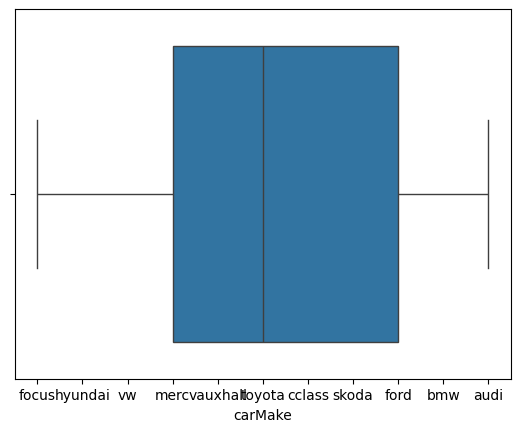

In [32]:
 #Box Plot 생성

sns.boxplot(data=full_data, x='carMake')

<Axes: xlabel='carMake'>

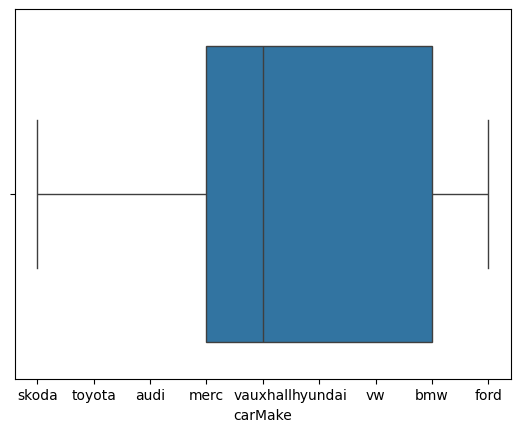

In [33]:
 #Box Plot 생성

sns.boxplot(data=full2_data, x='carMake')

<Axes: xlabel='model'>

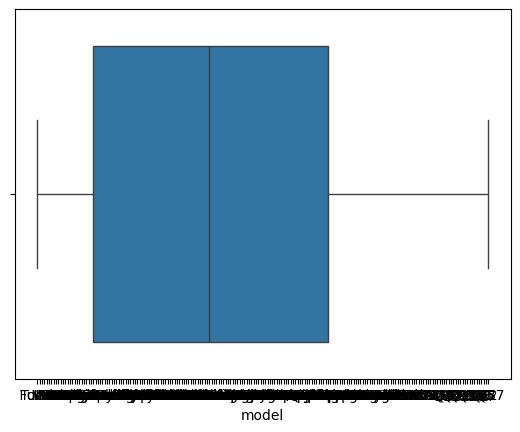

In [35]:
# Box Plot 생성

sns.boxplot(data=full_data, x='model')

<Axes: xlabel='model'>

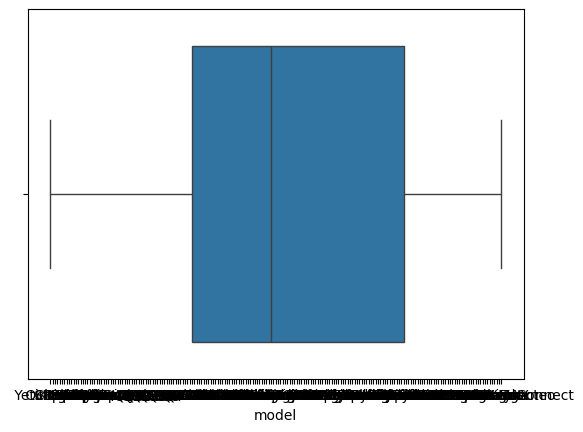

In [15]:
# Box Plot 생성

sns.boxplot(data=full2_data, x='model')

<Axes: xlabel='year'>

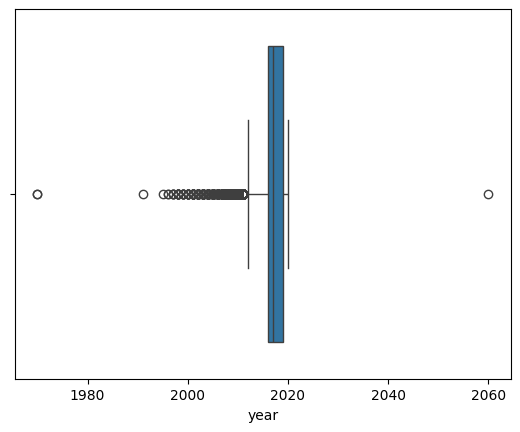

In [36]:
sns.boxplot(data=full_data, x='year')

<Axes: xlabel='year'>

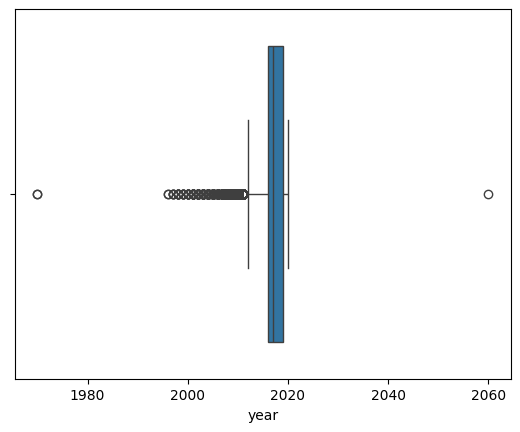

In [38]:
sns.boxplot(data=full2_data, x='year')

<Axes: xlabel='price'>

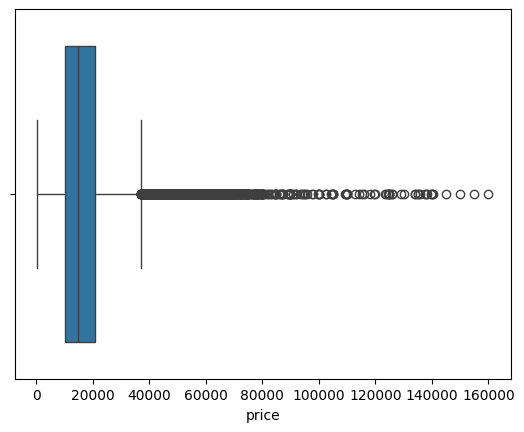

In [39]:
sns.boxplot(data=full_data, x='price')

<Axes: xlabel='price'>

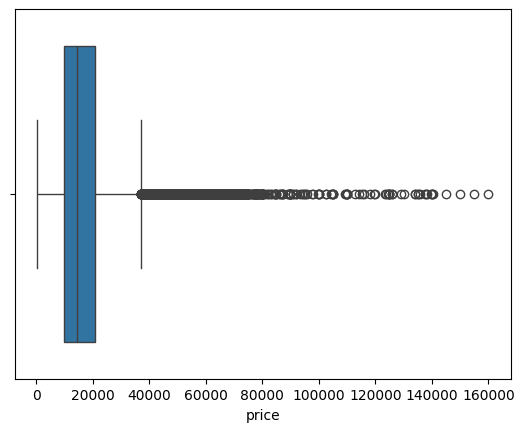

In [40]:
sns.boxplot(data=full2_data, x='price')

## describe 통계 비교

In [26]:
full_data['year'].describe()

,year
count,108540.000000
mean,2017.098028
std,2.130057
min,1970.000000
25%,2016.000000
50%,2017.000000
75%,2019.000000
max,2060.000000


In [27]:
full2_data['year'].describe()

,year
count,99187.000000
mean,2017.087723
std,2.123934
min,1970.000000
25%,2016.000000
50%,2017.000000
75%,2019.000000
max,2060.000000


In [28]:
print(full_data.describe(include=['object']))

         model transmission fuelType carMake Unnamed: 0
count   108540       108540   108540  108540          0
unique     195            4        5      11          0
top      Focus       Manual   Petrol    ford        NaN
freq     10042        61308    59875   17965        NaN


In [29]:
print(full2_data.describe(include=['object']))

          model transmission fuelType carMake
count     99187        99187    99187   99187
unique      195            4        5       9
top      Fiesta       Manual   Petrol    ford
freq       6557        56445    54928   17965


## year, price 이상치

### year

In [68]:
# IQR 계산
Q1 = full2_data["year"].quantile(0.25)
Q3 = full2_data["year"].quantile(0.75)
IQR = Q3 - Q1

# 이상치 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 탐지
outliers = full2_data[(full2_data["year"] < lower_bound) | (full2_data["year"] > upper_bound)]
print(outliers)


           model  year  price transmission  mileage fuelType    tax   mpg  \
114        Fabia  2011   2795       Manual    80000   Diesel   20.0  67.3   
5064    Roomster  2007   2995    Automatic    99700   Petrol  230.0  39.8   
5078       Fabia  2010   3500       Manual    95002   Diesel   20.0  67.3   
5079       Fabia  2011   3395       Manual    80000   Diesel   20.0  67.3   
5080     Octavia  2008   2895       Manual   135000   Diesel  165.0  49.6   
...          ...   ...    ...          ...      ...      ...    ...   ...   
98980      Focus  2006   2495    Automatic    70730   Petrol  260.0  36.7   
98982      C-MAX  2007   2695       Manual    82000   Petrol  235.0  39.8   
98983      Focus  2005   2495    Automatic    87908   Petrol  265.0  36.7   
99038     Fiesta  2009   4000       Manual    49500   Petrol  150.0  49.6   
99067      Focus  2011   6750       Manual    48000   Petrol  145.0  47.1   

       engineSize carMake  tax(짙)  
114           1.6   skoda     NaN  
506

In [64]:
q1=full2_data['year'].quantile(0.25)
q2=full2_data['year'].quantile(0.5)
q3=full2_data['year'].quantile(0.75)
iqr=q3-q1
iqr

3.0

In [65]:
condition=full2_data['year']>q3+1.5*iqr
full2_data[condition]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(짙)
98948,Fiesta,2060,6495,Automatic,54807,Petrol,205.0,42.8,1.4,ford,NaN


In [66]:
a=full2_data[condition].index
full2_data.drop(a,inplace=True)

<Axes: xlabel='year'>

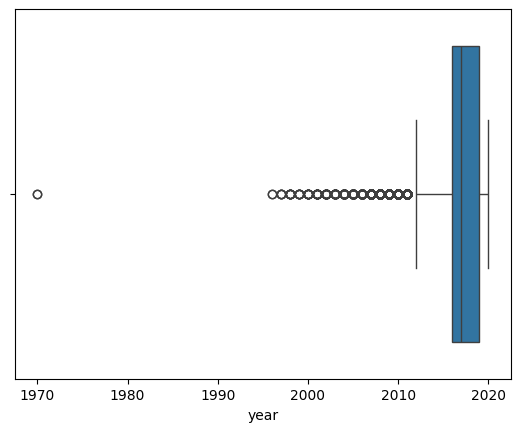

In [67]:
sns.boxplot(data=full2_data, x='year')

### price

<Axes: xlabel='price'>

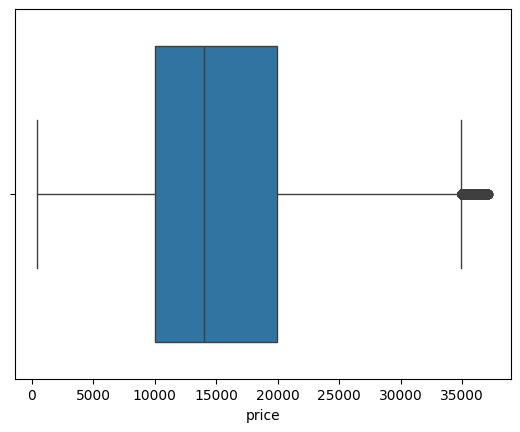

In [69]:
# 'year' 이상치
q1=full2_data['price'].quantile(0.25)
q2=full2_data['price'].quantile(0.5)
q3=full2_data['price'].quantile(0.75)
iqr=q3-q1
iqr

condition1=full2_data['price']>q3+1.5*iqr
full2_data[condition]

# 이상치 드롭
a=full2_data[condition1].index
full2_data.drop(a,inplace=True)

#box plot 다시 그리기
sns.boxplot(data=full2_data, x='price')

## mpg

<Axes: xlabel='mpg'>

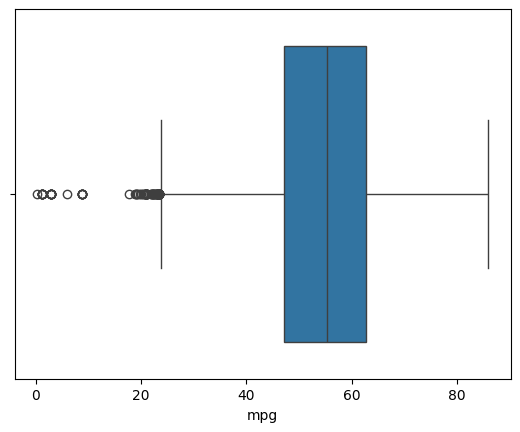

In [70]:
# 'mpg' 이상치
q1=full2_data['mpg'].quantile(0.25)
q2=full2_data['mpg'].quantile(0.5)
q3=full2_data['mpg'].quantile(0.75)
iqr=q3-q1
iqr

condition2=full2_data['mpg']>q3+1.5*iqr
full2_data[condition]

# 이상치 드롭
a=full2_data[condition2].index
full2_data.drop(a,inplace=True)

#box plot 다시 그리기
sns.boxplot(data=full2_data, x='mpg')